# Avacado classification and regression problem

## Predicting the average price of the avacado(Regression)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading / Importing the data

In [9]:
data=pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Information about the data
-Date - The date of the observation

-AveragePrice - the average price of a single avocado

-type - conventional or organic

-year - the year

-Region - the city or region of the observation

-Total Volume - Total number of avocados sold

-4046 - Total number of avocados with PLU 4046 sold

-4225 - Total number of avocados with PLU 4225 sold

-4770 - Total number of avocados with PLU 4770 sold

-Total Bags - Total number of bags delivered in each region

-Small Bags - Total number of small bags delivered in each region

-Large Bags - Total number of large bags delivered in each region

-Unnamed: 0 - Id

-XLarge Bags - Total number of Xtralarge bags delivered in each region

In [10]:
data.shape

(18249, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [13]:
data['Date']=pd.to_datetime(data['Date'])

# Null values

In [14]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
#sns.heatmap(data.isnull(), annot=True)

There is no null values available in the dataset.

# EDA / Data Analysis

In [16]:
# statistical summary 

data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [17]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

we can remove some useless columns from the dataset 

In [18]:
## Lets remove the uncessary colums as all fruits are of one type, and unnamed is not a required feild 
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['type'],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

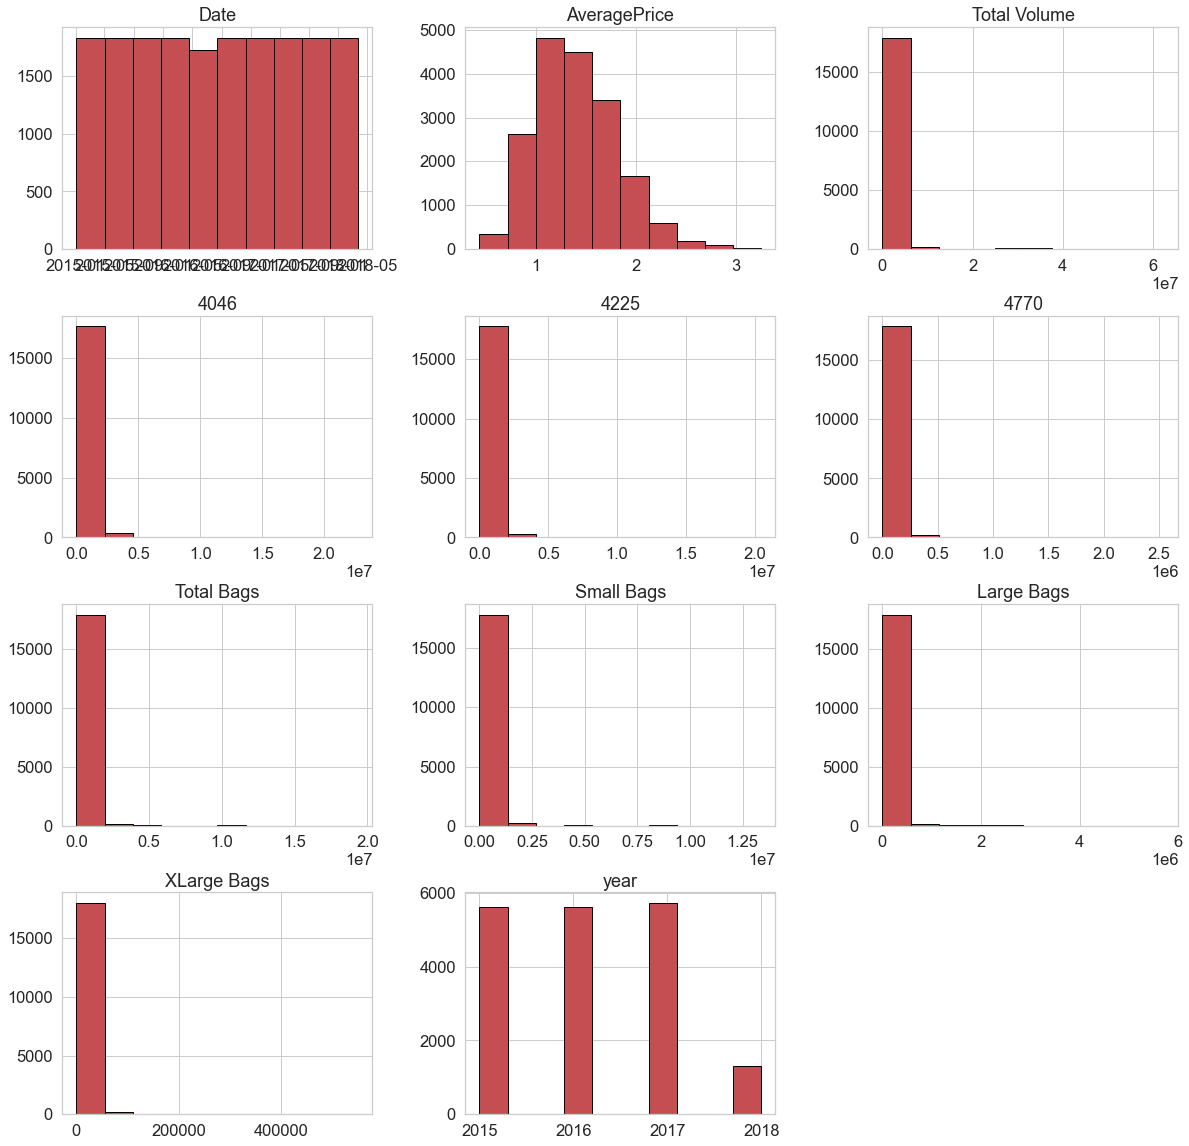

In [19]:
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
data.hist(figsize=(20,20),color='r', edgecolor='black',linewidth=1)

Skewness is present in the data .

Lets check the relations between the variables.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

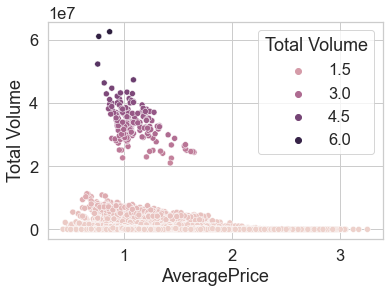

In [20]:
sns.scatterplot(x='AveragePrice',y='Total Volume',data=data,hue='Total Volume')

Price is high when volume is low.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

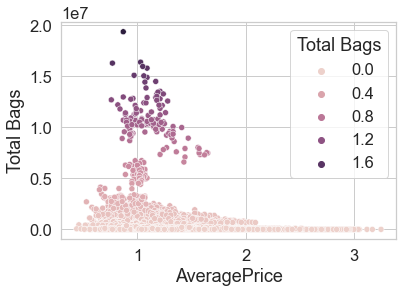

In [21]:
sns.scatterplot(x='AveragePrice',y='Total Bags',data=data,hue='Total Bags')

MOre bags , less the price

<AxesSubplot:xlabel='AveragePrice', ylabel='4046'>

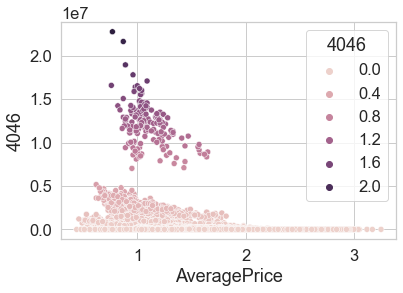

In [22]:
sns.scatterplot(x='AveragePrice',y='4046',data=data,hue='4046')

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

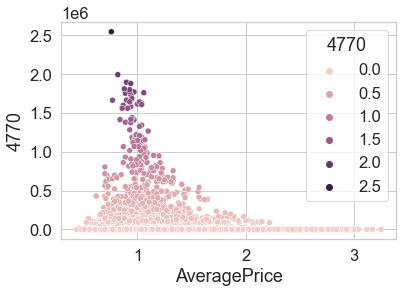

In [23]:
sns.scatterplot(x='AveragePrice',y='4770',data=data,hue='4770')

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

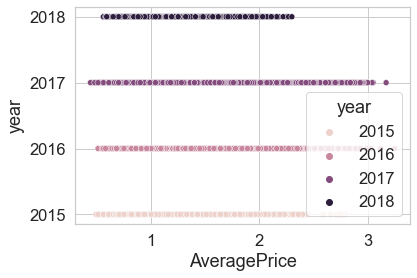

In [24]:
sns.scatterplot(x='AveragePrice',y='year',data=data,hue='year')

sale decreased in year 2018

<AxesSubplot:xlabel='AveragePrice'>

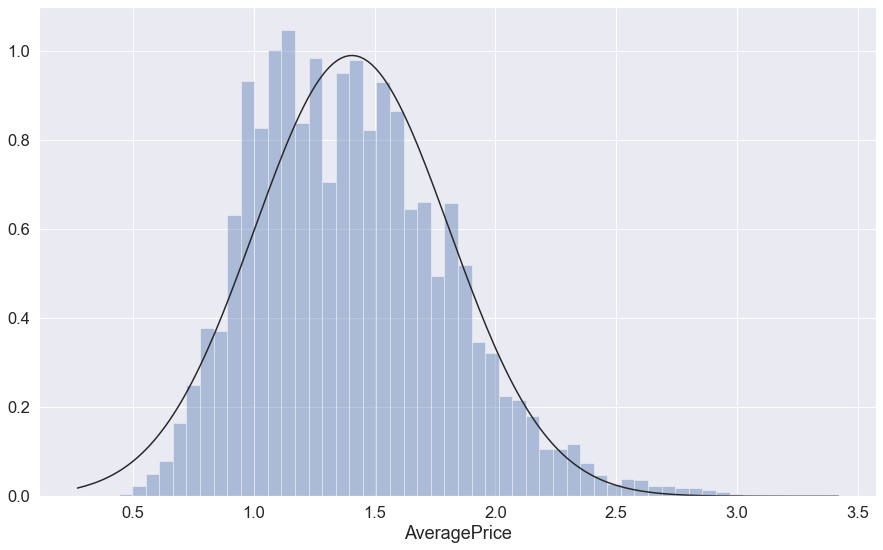

In [25]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

Most of the time , price of avocado remians between 1.0 and 2.0

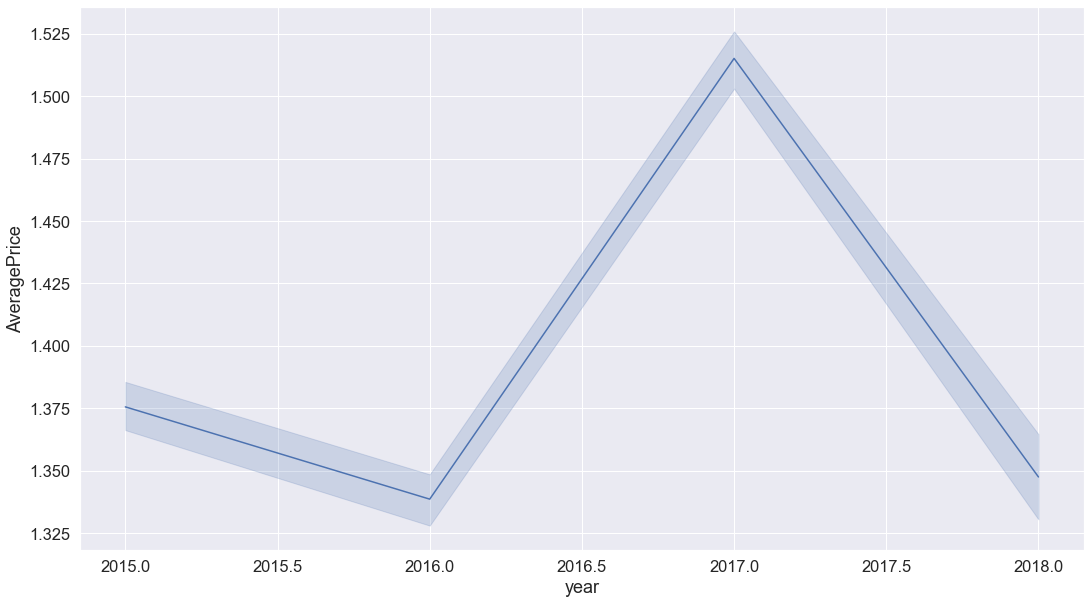

In [26]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", data=data)
plt.show()

in 2017 price was high all the time .

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

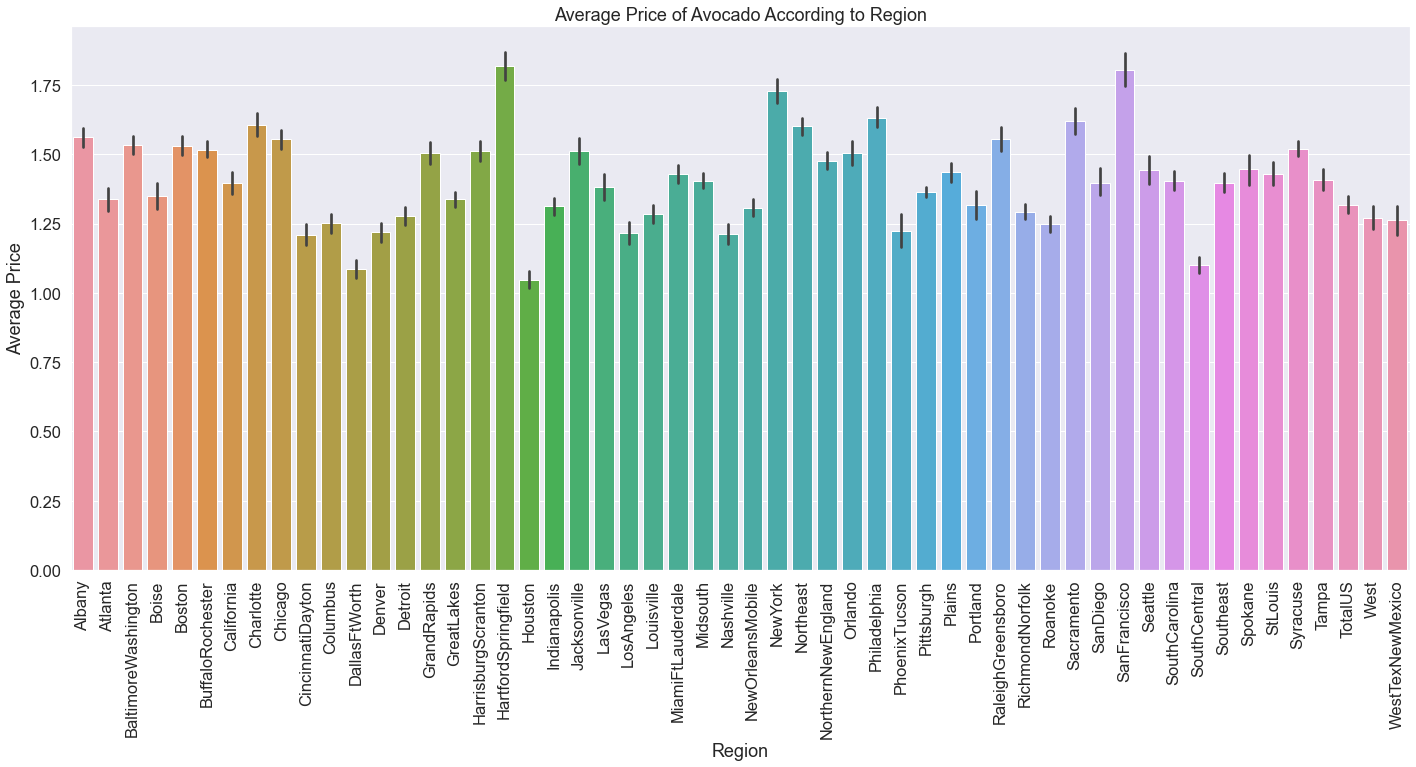

In [27]:
plt.figure(figsize=(24,10))
sns.barplot(x='region',y='AveragePrice',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Total Volume of Avocado consumed per Region')

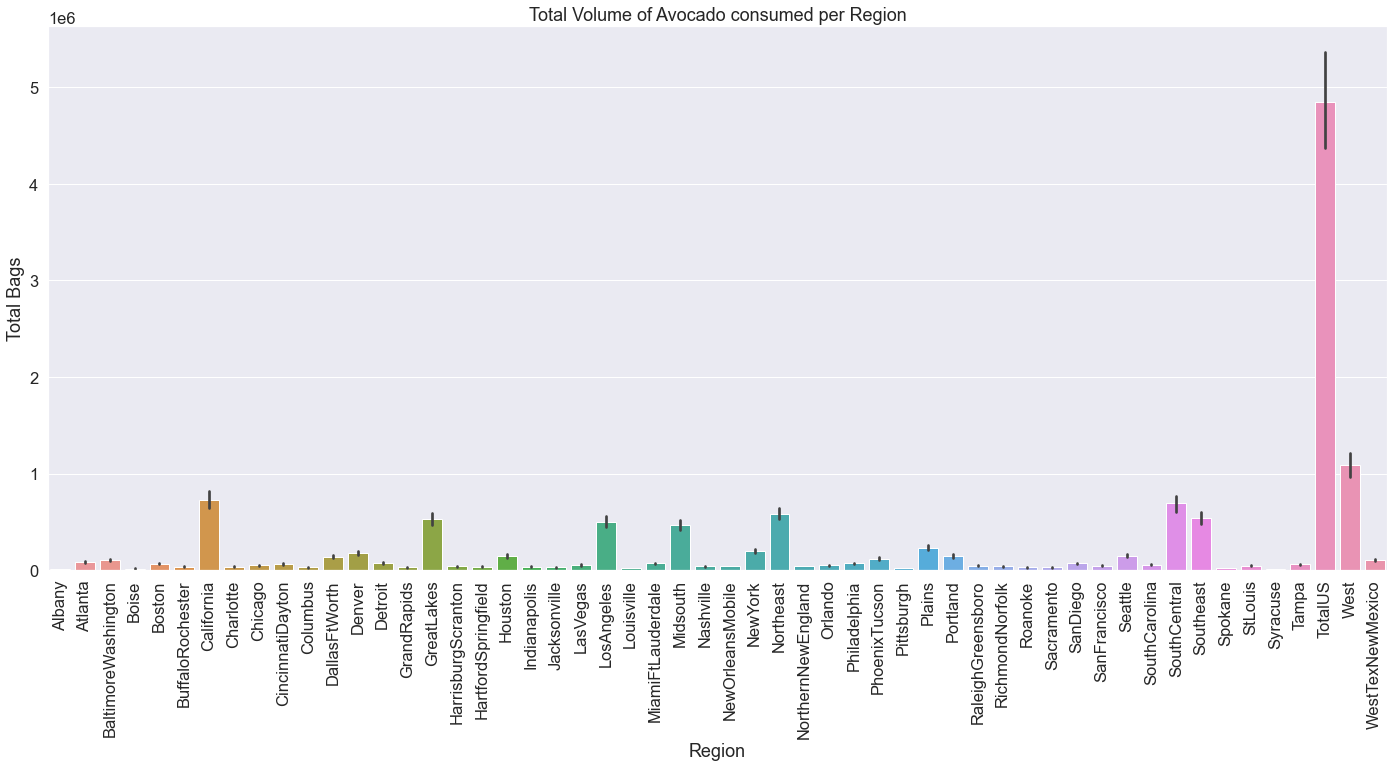

In [28]:
plt.figure(figsize=(24,10))
sns.barplot(x='region',y='Total Bags',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Bags')
plt.title('Total Volume of Avocado consumed per Region')

Text(0.5, 1.0, 'Average Price')

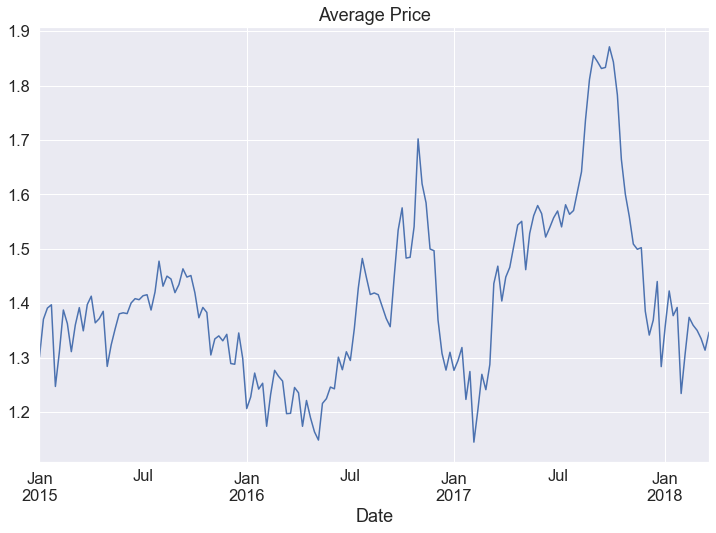

In [29]:
byDate=data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

# Correlation

In [30]:
corr= data.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

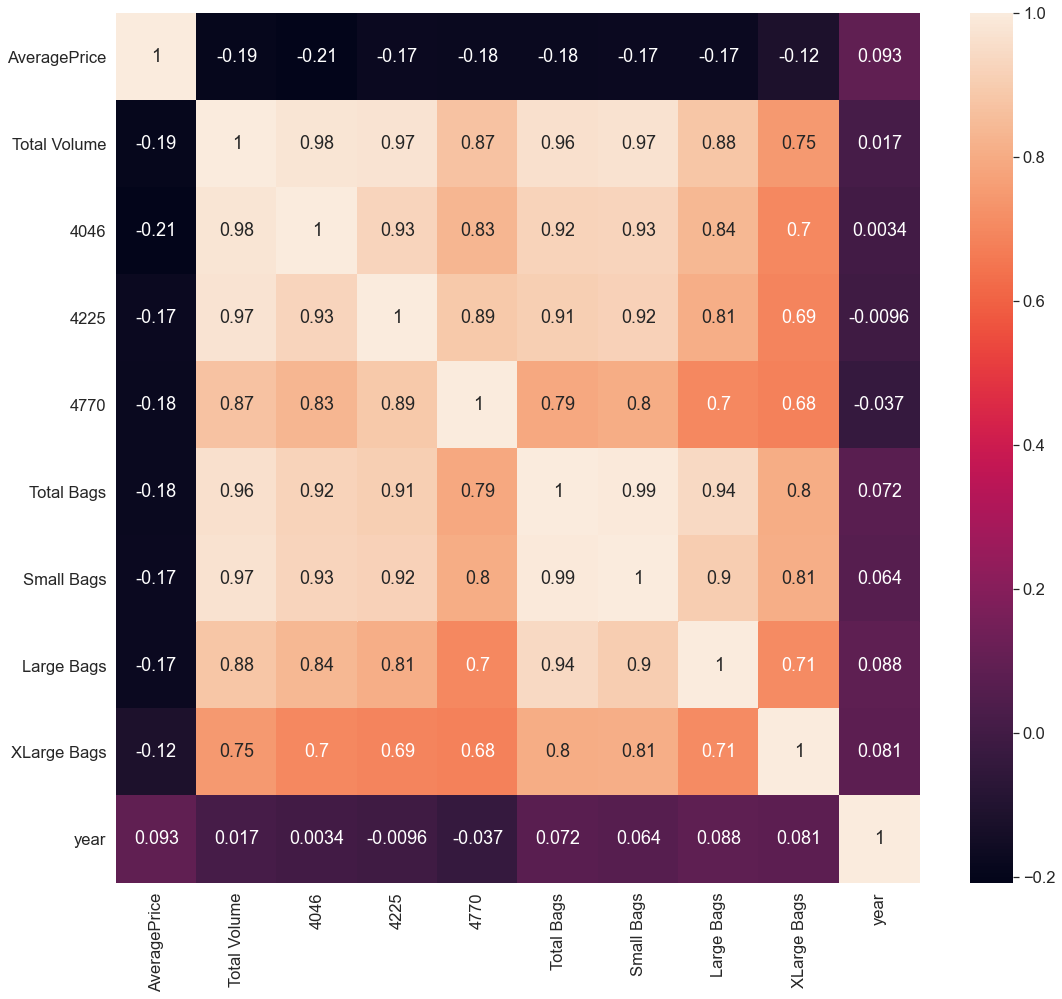

In [31]:
plt.figure(figsize=(18,16))
sns.heatmap(corr, annot= True)

small bags , large bags, 4770 are highly correlated with each other , so there can be multicollineaity so we can remove one of them.

# Label Encoding

In [32]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                  object
dtype: object

In [33]:
data.drop(['Date'],axis=1,inplace=True)

In [34]:
data.shape

(18249, 11)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
data["region"]=le.fit_transform(data["region"])
data["year"]=le.fit_transform(data["year"])
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,3,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,3,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,3,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,3,53


In [38]:
data.shape

(18249, 11)

# Outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
year               AxesSubplot(0.523571,0.125;0.110714x0.343182)
region             AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

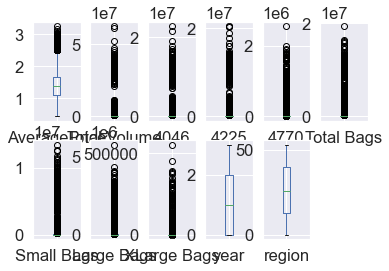

In [39]:
data.plot(kind = 'box',subplots = True,layout=(2,6))

In [40]:
#removing the outliers

from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,3,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,3,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,3,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,3,53


# Skewness

In [41]:
data.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
dtype: float64

In [42]:
for index in data.skew().index:
    if data.skew().loc[index]>0.55:
        data[index]=np.cbrt(data[index])

In [43]:
data.skew()

AveragePrice    0.070540
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
year            0.215339
region          0.000030
dtype: float64

# Scaling and splitting the data

In [44]:
# lets divide the data into x and y 

x= df.drop(['AveragePrice'], axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,3,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,3,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,3,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,3,53


In [45]:
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [46]:
#Applying the standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.3920086 , -0.34945151, -0.27849691, ..., -0.25902684,
        -1.21001338, -1.69549505],
       [-0.40125088, -0.3502761 , -0.30309279, ..., -0.25902684,
        -1.21001338, -1.69549505],
       [-0.33870193, -0.35000214, -0.14144901, ..., -0.25902684,
        -1.21001338, -1.69549505],
       ...,
       [-0.44184559, -0.34909848, -0.40879759, ..., -0.25902684,
         1.98075592,  1.74705401],
       [-0.43943771, -0.34833475, -0.40747397, ..., -0.25902684,
         1.98075592,  1.74705401],
       [-0.43816945, -0.34522454, -0.40903979, ..., -0.25902684,
         1.98075592,  1.74705401]])

In [47]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [48]:
x_train.shape

(14120, 10)

In [49]:
x_test.shape

(3531, 10)

In [50]:
y_train.shape

(14120,)

In [51]:
y_test.shape

(3531,)

# ML Models (Regression)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [53]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=40)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=40)
RFR=RandomForestRegressor(random_state=40)
GBR=GradientBoostingRegressor(random_state=40)

In [54]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [55]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('------------------------------------->',name,'<-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=20,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

-------------------------------------> LinearRegression <-------------------------------
LinearRegression()
R2_score =  0.14079540965360826
Mean_Squared_Error = 0.1246991098319994
Mean_Absolute_Error = 0.2899797214574716
Root_Mean_Squared_Error = 0.35312761125689307
Cross_Val_Score =  -1.014440069216969


-------------------------------------> Lasso <-------------------------------
Lasso()
R2_score =  -1.1642429164737678e-05
Mean_Squared_Error = 0.14513488758513152
Mean_Absolute_Error = 0.3123343173334039
Root_Mean_Squared_Error = 0.380965730197785
Cross_Val_Score =  -1.1966836452476293


-------------------------------------> Ridge <-------------------------------
Ridge()
R2_score =  0.1400722597558285
Mean_Squared_Error = 0.12480406288921232
Mean_Absolute_Error = 0.29014147451688765
Root_Mean_Squared_Error = 0.35327618500149754
Cross_Val_Score =  -1.015514533300028


-------------------------------------> DecisionTreeRegressor <-------------------------------
DecisionTreeRegressor(ra

In [56]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.140795,0.124699,0.289980,0.353128,-1.014440
1,Lasso,-0.000012,0.145135,0.312334,0.380966,-1.196684
2,Ridge,0.140072,0.124804,0.290141,0.353276,-1.015515
3,DecisionTreeRegressor,0.681296,0.046255,0.141563,0.215069,-0.481694
4,AdaBoostRegressor,0.458054,0.078654,0.228213,0.280454,-0.239353
5,RandomForestRegressor,0.850839,0.021648,0.105150,0.147133,0.245774
6,GradientBoostingRegressor,0.673607,0.047370,0.167591,0.217648,0.259450


RandomForestRegressor is performing well in this case , we'll try the hyperparameter tuning as well .

## Hyper parameter tuning 

In [57]:
#Taking long time


#from sklearn.model_selection import GridSearchCV
#parameter = { 
            "n_estimators"      : [10,50,100,150,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,3,4,5,8,10],
            "bootstrap": [True, False],
            }
#grid = GridSearchCV(RFR, param_grid=parameter, n_jobs=-1, cv=10)
#grid.fit(x_train, y_train)

IndentationError: unexpected indent (<ipython-input-57-fa3218c6264e>, line 3)

In [ ]:
#grid.best_score_ , grid.best_params_

# Saving the model

In [58]:
import joblib
joblib.dump(RFR,'Avocado_AveragePrice_Regression.obj')

['Avocado_AveragePrice_Regression.obj']

In [59]:
model=joblib.load('Avocado_AveragePrice_Regression.obj')

In [60]:
pred= model.predict(x_test)
pred

array([1.594 , 1.0085, 1.1673, ..., 1.7168, 1.7696, 1.009 ])

# Applying the classification alogrithms on region

In [61]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,3,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,3,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,3,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,3,53


In [62]:
x= df.iloc[:,0:-1]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,3
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,3


In [63]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=973)

In [66]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(yc_test,pre, average="macro"):
    LB = LabelBinarizer()
    LB.fit(yc_test)
    yc_test = LB.transform(yc_test)
    pre = LB.transform(pre)
    return roc_auc_score(yc_test, pre, average=average)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [68]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.16510903426791276
[[ 1  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  4  1 ... 25 11  5]
 [ 0  2  0 ...  7 18  3]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.01      0.33      0.03         3
           1       0.10      0.14      0.12        43
           2       0.44      0.36      0.40        90
           3       0.00      0.00      0.00         0
           4       0.12      0.31      0.17        26
           5       0.00      0.00      0.00         0
           6       0.41      0.16      0.24       158
           7       0.01      1.00      0.03         1
           8       0.49      0.82      0.62        50
           9       0.53      0.13      0.21       271
          10       0.00      0.00      0.00         0
          11       0.02      0.08      0.03        12
          12       0.44      0.22      0.29       136
          13       0.38      0.44      0.41        57
          14 

In [69]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.16510903426791276
[[ 1  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  4  1 ... 25 11  5]
 [ 0  2  0 ...  7 18  3]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.01      0.33      0.03         3
           1       0.10      0.14      0.12        43
           2       0.44      0.36      0.40        90
           3       0.00      0.00      0.00         0
           4       0.12      0.31      0.17        26
           5       0.00      0.00      0.00         0
           6       0.41      0.16      0.24       158
           7       0.01      1.00      0.03         1
           8       0.49      0.82      0.62        50
           9       0.53      0.13      0.21       271
          10       0.00      0.00      0.00         0
          11       0.02      0.08      0.03        12
          12       0.44      0.22      0.29       136
          13       0.38      0.44      0.41        57
          14 

In [70]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.16510903426791276
[[ 1  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  4  1 ... 25 11  5]
 [ 0  2  0 ...  7 18  3]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.01      0.33      0.03         3
           1       0.10      0.14      0.12        43
           2       0.44      0.36      0.40        90
           3       0.00      0.00      0.00         0
           4       0.12      0.31      0.17        26
           5       0.00      0.00      0.00         0
           6       0.41      0.16      0.24       158
           7       0.01      1.00      0.03         1
           8       0.49      0.82      0.62        50
           9       0.53      0.13      0.21       271
          10       0.00      0.00      0.00         0
          11       0.02      0.08      0.03        12
          12       0.44      0.22      0.29       136
          13       0.38      0.44      0.41        57
          14 

In [71]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.16510903426791276
[[ 1  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  4  1 ... 25 11  5]
 [ 0  2  0 ...  7 18  3]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.01      0.33      0.03         3
           1       0.10      0.14      0.12        43
           2       0.44      0.36      0.40        90
           3       0.00      0.00      0.00         0
           4       0.12      0.31      0.17        26
           5       0.00      0.00      0.00         0
           6       0.41      0.16      0.24       158
           7       0.01      1.00      0.03         1
           8       0.49      0.82      0.62        50
           9       0.53      0.13      0.21       271
          10       0.00      0.00      0.00         0
          11       0.02      0.08      0.03        12
          12       0.44      0.22      0.29       136
          13       0.38      0.44      0.41        57
          14 

In [72]:
knn = KNeighborsClassifier()

score=cross_val_score(knn,x,y,cv=20)
print(score)
print(score.mean())
print(score.std())

[0.59796149 0.7202718  0.67723669 0.50962627 0.69195923 0.65685164
 0.6783692  0.75198188 0.72819932 0.54360136 0.43714609 0.4829932
 0.42176871 0.38435374 0.44104308 0.42743764 0.43424036 0.42857143
 0.44444444 0.39229025]
0.5425173920077657
0.12664788201944271


In [73]:
dt = DecisionTreeClassifier()

score=cross_val_score(dt,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.6806342  0.65495751 0.71954674 0.64419263 0.67535411 0.6101983
 0.5631728  0.58753541 0.54560907 0.59716714]
0.6278367912633663
0.053177061942843475


In [74]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))

0.9054092325120362


In [75]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.055791560464457664
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ... 20  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        63
           7       0.05      1.00      0.09        70
           8       0.00      0.00      0.00        83
           9       0.00      0.00      0.00        66
          10       0.09      0.02      0.03        65
          11       0.04      0.56      0.07        62
          12       0.00      0.00      0.00        68
          13       0.00      0.00      0.00        65
          14

In [78]:
import numpy as np
a= np.array(y_test)
pred = np.array(rf.predict(x_test))
df_=pd.DataFrame({'origional':a,'predicted':pred},index = range(len(a)))
a
df_

,origional,predicted
0,12,12
1,28,28
2,43,43
3,4,4
4,4,4
...,...,...
3526,36,36
3527,18,18
3528,24,24
3529,9,9


# Saving the model ( calssification)

we'll save random forest classifier with less diff in accuracy and cv score

In [79]:

import joblib
joblib.dump(rf,'Avocado_classification.obj')

['Avocado_classification.obj']